## Gridsearch SARIMA Models (Core)
### Zillow Data
You will continue working with Zillow's publicly available Zillow House Value Index (ZHVI) that you prepared for a previous core assignment. https://www.zillow.com/research/data/

* You can start working in the same notebook you used for the Preparing Time Series from Wide-Form Data (Core) assignment
* Specifically, you will be using the Home Value data set for:
    * Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    * Geography = "City"
* We have already downloaded the file for you and uploaded it to Google Drive.
    * Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    * Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

### Review: Previous Assignment
In a core assignment from last week (Preparing Time Series from Wide-Form Data (Core)), you worked with this dataset.

* You filtered the data to keep only the 4 largest cities based on their "SizeRank"
* You melted the wide-form data for the 4 largest cities into long-form time series with a datetime index.
* You resampled the data to monthly frequency, grouped by City.
* You performed EDA and answered some questions comparing the cities, including selecting the city that had the highest home value at the end of 2008 and the one that had the lowest value at the end of 2008.

## Time Series Models for Home Values
Your overall goal is to forecast the home values for the city with the highest home value in 2008(New York) 6months into the future (beyond the dataset).

* Filter the dataset only to include values starting in 2018
* Check for and address null values.
* Decompose the Time series to detect seasonality and decide if your model should or should not have a seasonal component
* Determine Time Series Model Orders
    * Check the time series for stationarity.
        * Determine the number of differencing needed to make the data stationary
    * Check the ACF/PACF Plots of the differenced data to determine the orders
* Split the time series into training and test data (Remember we want to predict 6 months, and our data has been resampled to monthly)
* Fit a manual ARIMA/SARIMA model based on the orders determined during your exploration.
    * Make forecasts with your model.
    * Plot the forecasts versus the test data
    * Obtain metrics for evaluation
* Tune with pmdarima's auto_arima
    * Fit a model on training data with the best parameters from auto_arima
    * Obtain metrics for evaluation
    * Make forecasts with the auto_arima model
    * Plot the forecasts versus the test data
* Select your final model
* Make true future forecasts using the entire dataset (for dates beyond the entire ts).
    * Calculate the predicted net change in home value for the forecasted period as both:
        * Raw values for change in the final month in the forecast vs. the first month.
        * Convert the raw delta into a percent change.

#### Answer the following questions in a Markdown cell

* What is the predicted home value in New York City 6 months into the future (beyond the dataset)?
* What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?

## Previous Assignment: Preparing Time Series from Wide-Form Data (Core)

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

### Load in the Zillow Home Value Index dataframe

In [2]:
# Load the data
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


### Filter the 4 largest cities into a new dataframe

In [3]:
four_largest_cities = df[df['SizeRank'] < 4]
four_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
four_largest_cities['RegionName'].unique()

array(['New York', 'Los Angeles', 'Houston', 'Chicago'], dtype=object)

### Melt the data to long-form and prepare it for time series analysis

In [5]:
df_melted = pd.melt(four_largest_cities, id_vars=['RegionName'])
df_melted

,RegionName,variable,value
0,New York,RegionID,6181
1,Los Angeles,RegionID,12447
2,Houston,RegionID,39051
3,Chicago,RegionID,17426
4,New York,SizeRank,0
...,...,...,...
1115,Chicago,2022-08-31,315587.0
1116,New York,2022-09-30,781622.0
1117,Los Angeles,2022-09-30,966595.0
1118,Houston,2022-09-30,272639.0


In [6]:
df_melted = pd.melt(four_largest_cities.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName']),id_vars=['RegionName'],var_name='Date',value_name='ZHVI')
df_melted

,RegionName,Date,ZHVI
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [7]:
# Convert the melted dates into datetime datatype
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   ZHVI        1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


In [8]:
# Make the datetime column the index
df_melted = df_melted.set_index('Date')
df_melted

,RegionName,ZHVI
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [9]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  1092 non-null   object 
 1   ZHVI        1087 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [10]:
# interpolate missing values of ZHVI column
df_melted['ZHVI'] = df_melted['ZHVI'].interpolate()

In [11]:
# check if missing values still exist
df_melted.isna().sum()

RegionName    0
ZHVI          0
dtype: int64

### Resample the dataframe as monthly frequency, grouped by City

In [12]:
df_res = df_melted.groupby('RegionName').resample('M').mean()
df_res

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

### Plot the home values for all 4 cities. (Hint: use unstack)
* Make sure to add a title and axis labels.
* Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
    * Hint: use the FuncFormatter from matplotlib.

In [13]:
df_unstacked = df_res.unstack(level=0)
df_unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

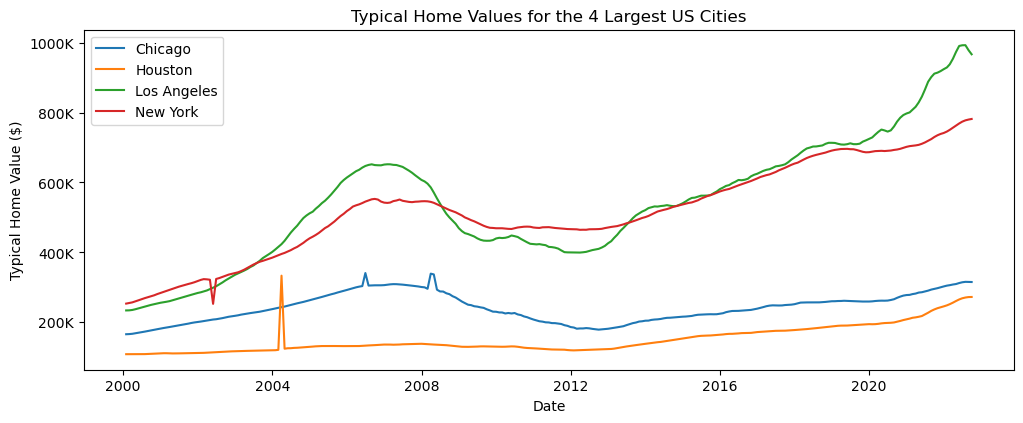

In [14]:
# Define the formatter function
def thousands(x, pos):
    return f'{int(x/1000)}K'

# Create the formatter object using the function
fmt_thous = mticks.FuncFormatter(thousands)

# Create the plot with a specified figure size
fig, ax = plt.subplots(figsize=(12, 5))

# Plot each city's home values
for column in df_unstacked['ZHVI']:
    ax.plot(df_unstacked.index, df_unstacked['ZHVI'][column], label=column)

# Set the title and labels
ax.set_title('Typical Home Values for the 4 Largest US Cities')
ax.set_xlabel('Date')
ax.set_ylabel('Typical Home Value ($)')

# Set the y-axis major formatter to the custom formatter
ax.yaxis.set_major_formatter(fmt_thous)

# Rotate date labels automatically
fig.autofmt_xdate(which='major',rotation=0, ha='center')

# Display the legend
ax.legend()

# Show the plot
plt.show()

### Answer the following 2 questions using pandas:
#### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?
* Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

#### Using pd.IndexSlice with the multiindex

In [15]:
# select the data for the end of 2008
end_of_2008_slice = pd.IndexSlice[:, '2008-12-31']
end_of_2008_data = df_res.loc[end_of_2008_slice,'ZHVI']

In [16]:
# City with the highest Typical Home Value at the end of 2008
max_value_city_2008 = end_of_2008_data.idxmax()[0]
max_value_city_2008

'New York'

In [17]:
# City with the lowest Typical Home Value at the end of 2008
min_value_city_2008 = end_of_2008_data.idxmin()[0]
min_value_city_2008

'Houston'

#### Using unstacked dataframe

In [18]:
# select the data for the end of 2008
zhvi_dec_2008 = df_unstacked.loc['2008-12-31', 'ZHVI']

# City with the highest Typical Home Value at the end of 2008
highest_value_city_2008 = zhvi_dec_2008.idxmax()
highest_value_city_2008

'New York'

In [19]:
# City with the lowest Typical Home Value at the end of 2008
lowest_value_city_2008 = zhvi_dec_2008.idxmin()
lowest_value_city_2008

'Houston'

#### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?
* Hint: you can use .diff() to calculate the change in values

In [20]:
# Select November and December 2008
nov_dec_2008 = df_unstacked['ZHVI'].loc['2008-11-30':'2008-12-31']
nov_dec_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [21]:
# Calculate the difference between the two months for each city
nov_dec_diff = nov_dec_2008.diff().iloc[-1]

for city, change in nov_dec_diff.items():
    print(f"{city}: ${change:,.0f}")

Chicago: $-5,753
Houston: $-964
Los Angeles: $-12,611
New York: $-4,458


## Gridsearch SARIMA Models (Core)

### Imports (additional)

In [22]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)

### Custom Functions

In [23]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [24]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [26]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [27]:
df_unstacked.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=273, freq='M')

In [28]:
df_unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

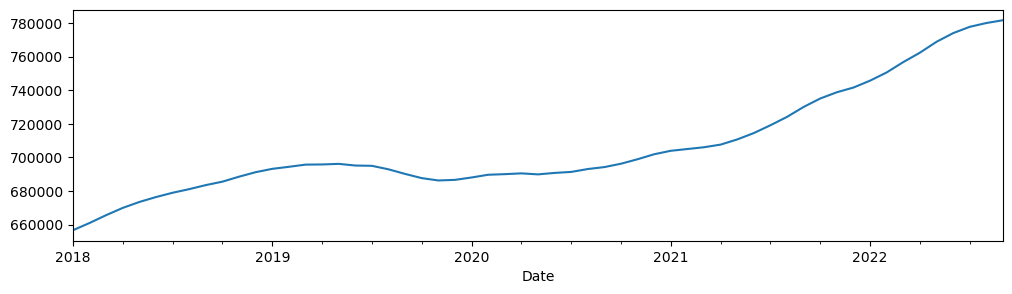

In [29]:
# Define the time series
ts = df_unstacked.loc['2018':, ('ZHVI', 'New York')]
ts.plot();

In [30]:
ts.isna().sum()

0

C:\Users\bandi\AppData\Local\Temp\ipykernel_51092\1851023562.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


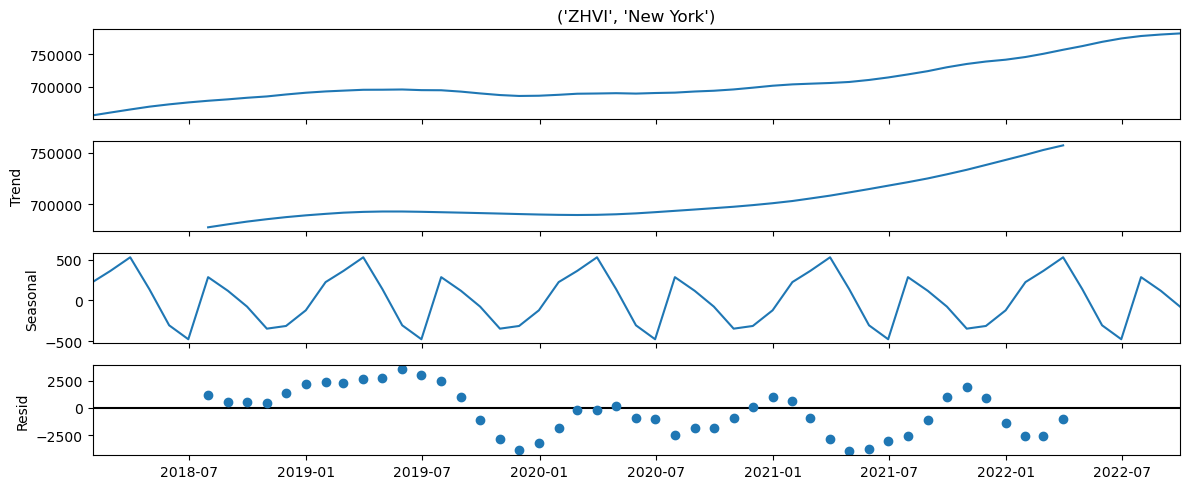

In [31]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [32]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  1006.13 which is ~0.81% of the variation in time series.


In [33]:
# Check for stationarity
get_adfuller_results(ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


In [34]:
# determine d
d = ndiffs(ts)
print (f'd = {d}')
# determine D
D = nsdiffs(ts, m = 12)
print (f'D = {D}')

d = 2
D = 0


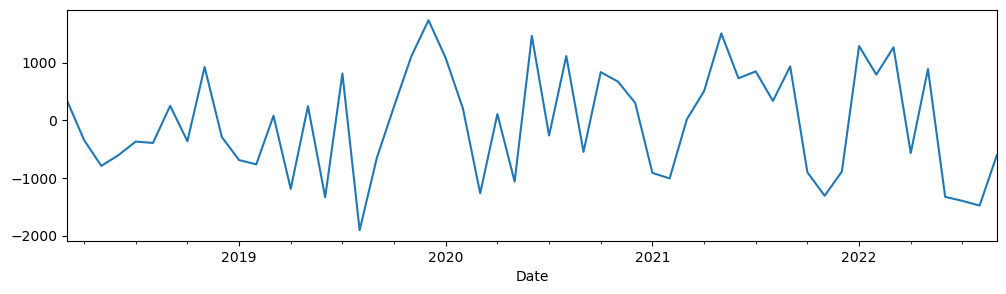

In [35]:
# Difference twice (d = 2)
ts_diff = ts.diff().diff().dropna()

# Visualize the differenced data
ts_diff.plot();

In [36]:
# Check the differenced data for stationarity with the Ad Fuller Test
adfuller_results = get_adfuller_results(ts_diff, label='differenced')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
differenced,-5.461615,2,52,0.000003,0.05,True


The differenced data is stationary.

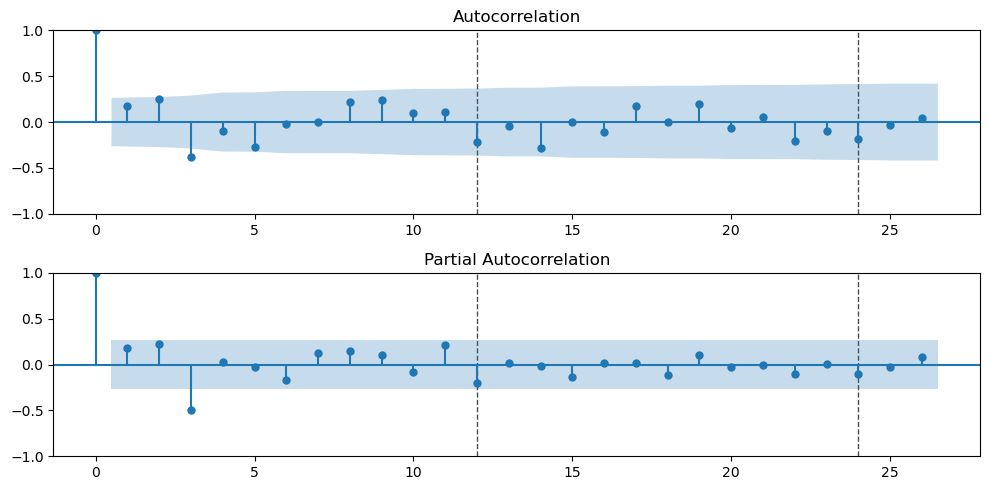

In [37]:
# Check the ACF/PACF Plots of the differenced data to determine the orders
plot_acf_pacf(ts_diff, annotate_seas=True, m = 12, nlags = 26);

### Train Test Split
We want to define the number of lags needed for 6 months of predictions.  6 months is about 26 weeks, and we have 5 business days per business week x 26 weeks, so we define our test lags with 5*26.

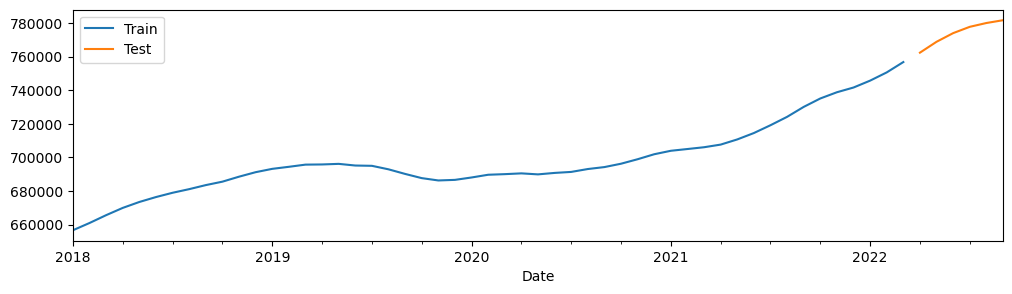

In [38]:
# Set test_size to 6 for 6 months
n_test_lags = 6

# Modeling to predict 6 months into the future
train, test = train_test_split(ts, test_size=n_test_lags)

# Visualize train-test-split
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

### Fit initial model

In [72]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 0 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     ('ZHVI', 'New York')   No. Observations:                   51
Model:                   ARIMA(1, 2, 0)   Log Likelihood                -402.198
Date:                  Thu, 04 Apr 2024   AIC                            808.395
Time:                          18:58:39   BIC                            812.179
Sample:                      01-31-2018   HQIC                           809.831
                           - 03-31-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0014      0.097     -0.014      0.988      -0.191       0.188
sigma2      7.852e+05    2.2e+05      3.564      0.000    3.53e+05    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.25   Prob(JB):                         0.39
Heteroskedasticity (H):               2.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

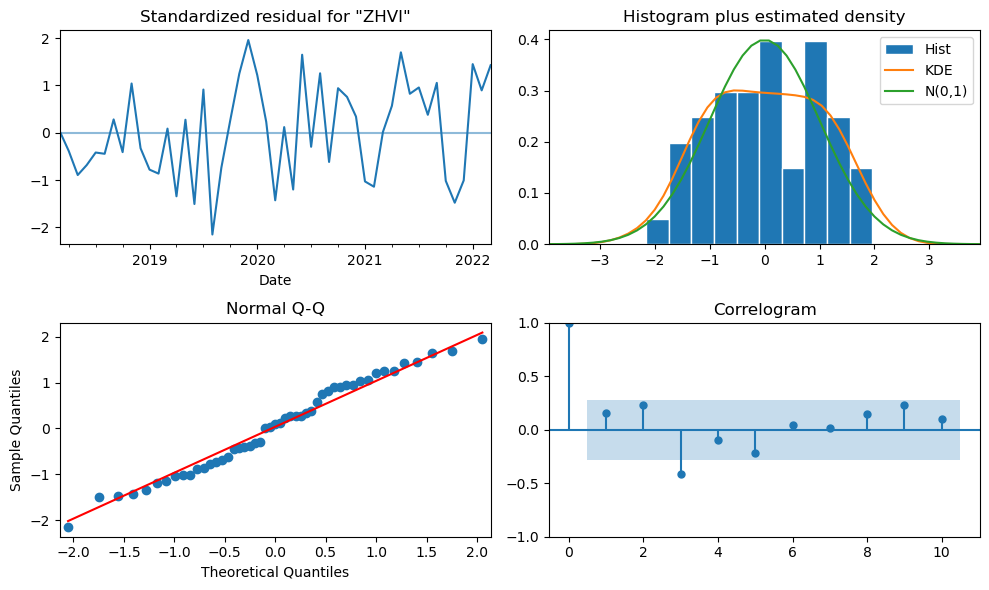

In [73]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,217.822
- MSE = 36,194,677.245
- RMSE = 6,016.201
- R^2 = 0.198
- MAPE = 0.54%


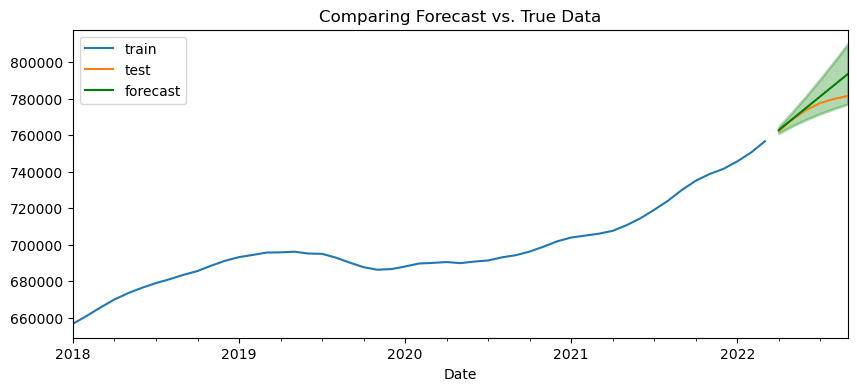

In [74]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

## Auto_Arima

In [75]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=False,  
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1036.894, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.717, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=928.324, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=910.593, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=940.569, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=907.207, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1034.889, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=908.592, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=913.343, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=926.258, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.418 seconds


In [76]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 0)


In [77]:
# Try auto_arima orders
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary of the best model from auto_arima
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     ('ZHVI', 'New York')   No. Observations:                   51
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -452.949
Date:                  Thu, 04 Apr 2024   AIC                            911.898
Time:                          18:59:06   BIC                            917.634
Sample:                      01-31-2018   HQIC                           914.082
                           - 03-31-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.008    122.642      0.000       0.984       1.016
ma.L1         -0.9996      0.073    -13.656      0.000      -1.143      -0.856
sigma2      4.315e+06   4.01e-09   1.08e+15      0.000    4.32e+06    4.32e+06
===================================================================================
Ljung-Box (L1) (Q):                  39.10   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.00   Prob(JB):                         0.77
Heteroskedasticity (H):               2.15   Skew:                            -0.20
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+29. Standard errors may be unstable.
"""

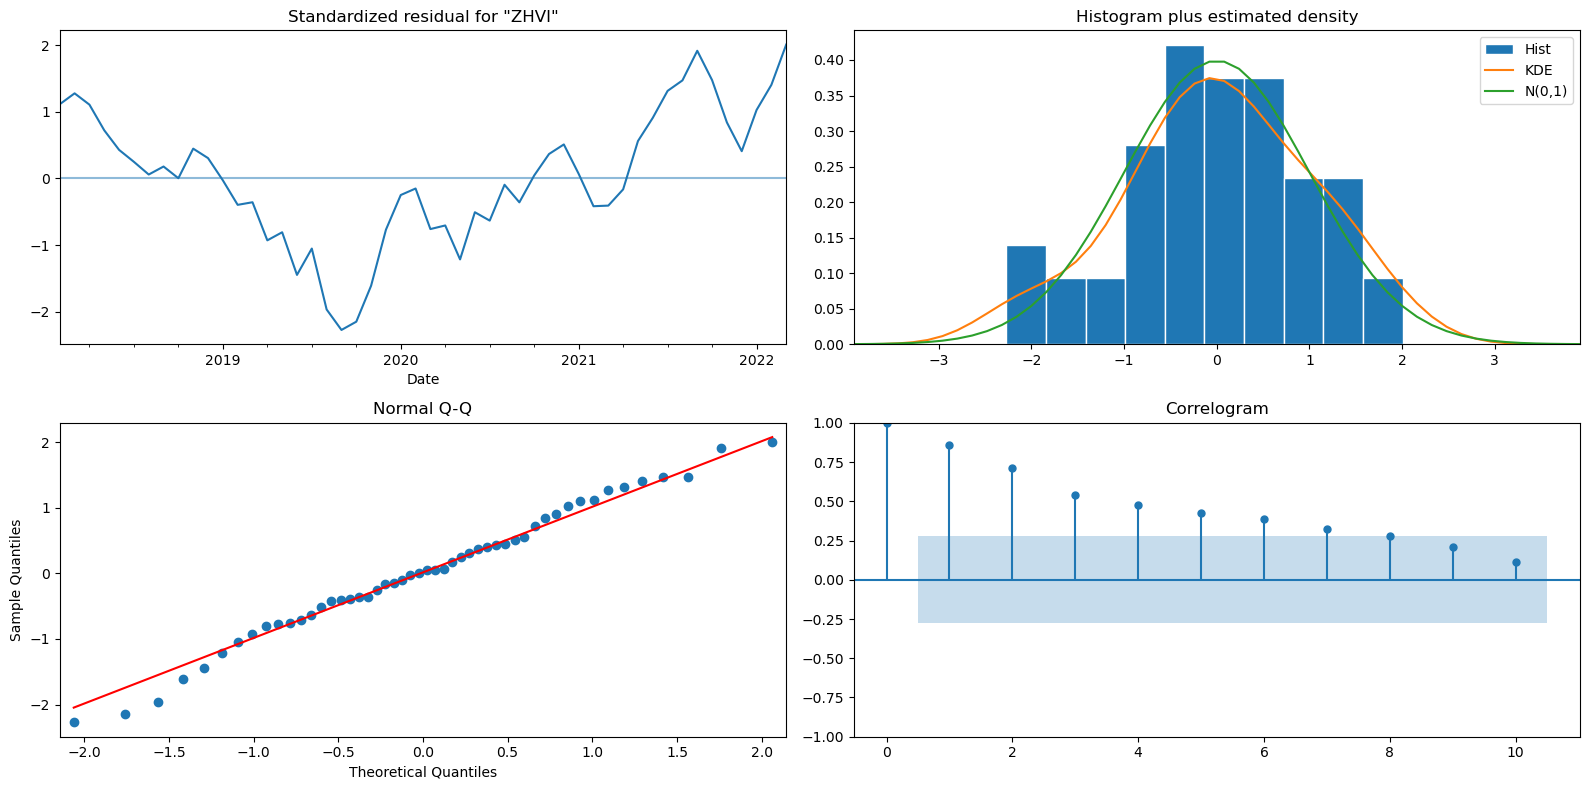

In [78]:
# Obtain diagnostic plots
fig = auto_sarima.plot_diagnostics()
fig.set_size_inches(16,8)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,336.391
- MSE = 119,088,166.132
- RMSE = 10,912.752
- R^2 = -1.640
- MAPE = 1.33%


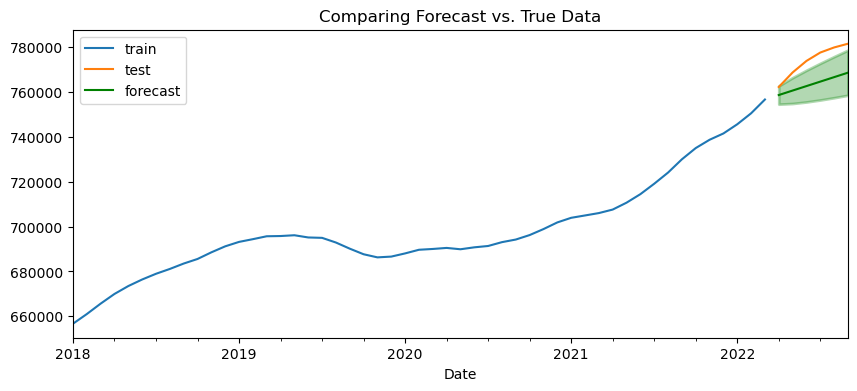

In [79]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [80]:
# Define the data for the comparison as dictionaries
initial_model_metrics = {
    'MAE': 4217,
    'MSE': 36194677,
    'RMSE': 6016,
    'R²': 0.198,
    'MAPE': '0.54%',
    'AIC': 808,
    'BIC': 812
}

auto_model_metrics = {
    'MAE': 10336,
    'MSE': 119088166,
    'RMSE': 10912,
    'R²': -1.640,
    'MAPE': '1.33%',
    'AIC': 911,
    'BIC': 917
}

column_names = {
    'Initial Model': 'Initial Model (1,2,0)',
    'Auto Model': 'Auto Model (1,1,1)'
}

# Create a DataFrame from the dictionaries
comparison_df = pd.DataFrame({
    column_names['Initial Model']: initial_model_metrics,
    column_names['Auto Model']: auto_model_metrics
})

# Display the DataFrame
comparison_df.T

,MAE,MSE,RMSE,R²,MAPE,AIC,BIC
"Initial Model (1,2,0)",4217,36194677,6016,0.198,0.54%,808,812
"Auto Model (1,1,1)",10336,119088166,10912,-1.64,1.33%,911,917


The preferred choice is the (1,2,0) model of the initial model.
* It has better regression metrics such as higher R², lower MAE, MSE, RMSE and MAPE.
* The AIC and BIC scores are lower than the auto model.

## Extracting a Future Forecast

In [82]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 0 # Seasonal period

final_model = tsa.ARIMA(ts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [83]:
len(test)

6

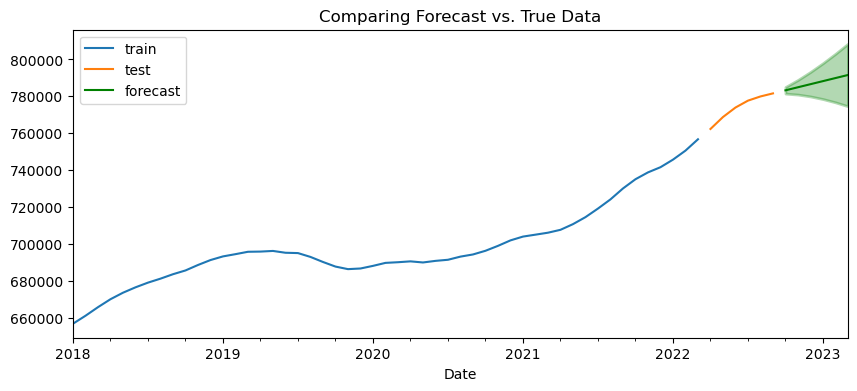

In [84]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

### Summarizing the Forecast

In [85]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2022-10-31 00:00:00'), Timestamp('2023-03-31 00:00:00'))

In [86]:
# Defining the starting value
starting_value = forecast_df['mean'].iloc[0]
starting_value

783284.8005912238

In [87]:
# Defining the final value
final_value = forecast_df['mean'].iloc[-1]
final_value

791598.7982645902

In [88]:
# Calculating the change in values
change = final_value - starting_value
change

8313.997673366452

In [89]:
# Convert the raw delta into a percent change
perc_change = (change / starting_value) * 100
perc_change

1.0614271676267741

### Answer the following questions
What is the predicted home value in New York City 6 months into the future (beyond the dataset)?

In [90]:
print(f'The predicted home value is approximately ${final_value:,.2f}.')

The predicted home value is approximately $791,598.80.


What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?

In [91]:
print(f'The percent change is approximately {perc_change:.4f}%.')

The percent change is approximately 1.0614%.
